In [127]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
ols = LinearRegression()
logit = LogisticRegression(C=1e5) 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
from sklearn import metrics
import pprint

# Making it so that we can see all columns of the dataframe
pd.set_option('display.max_columns', None)

# Importing the data
df_orig=pd.read_csv('standardized_no_outlier_dummified_df_total.csv',index_col='Id')
df=df_orig[~df_orig.SalePrice.isnull()]
undum_df_orig=pd.read_csv('standardized_no_outlier_undummified_df_train.csv',index_col='Id')
undum_df=undum_df_orig[~undum_df_orig.SalePrice.isnull()]

##############################################
# Specify which dataframe to work with:
##############################################
# df=purged_dummified_grouped_baseline_df
print(df.isnull().sum().sum())
print(undum_df.isnull().sum().sum())
df.sample(10)


0
0


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,YrSold,SalePrice,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Pave,Alley__No Alley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__No Masonry Veneer,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__No Basement,BsmtFinType1__Rec,BsmtFinType1__Unf,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__Y,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence,MiscFeature__Shed,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,WoodDeckSF__1,OpenPorchSF__1,EnclosedPorch__1,3SsnPorch__1,ScreenPorch__1,PoolArea__1,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [128]:
# df_orig.head(5)  # Sale price is there
df_orig.SalePrice.isnull()   # there are observations with saleprice being null
df.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,YrSold,SalePrice,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Pave,Alley__No Alley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__No Masonry Veneer,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__No Basement,BsmtFinType1__Rec,BsmtFinType1__Unf,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__Y,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence,MiscFeature__Shed,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,WoodDeckSF__1,OpenPorchSF__1,EnclosedPorch__1,3SsnPorch__1,ScreenPorch__1,PoolArea__1,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

## Original variable categorization before VIF exercise begins

In [129]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MoSold']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']

cont_var_for_tuning = ordinal_var_processed + cont_var_processed

## Forming the dfs that are used for VIF

In [130]:

x=df.drop('SalePrice',axis=1)
y=df.SalePrice


cat_x=undum_df.drop('SalePrice',axis=1)
cat_y=undum_df.SalePrice

# Train Test Split (ALL FEATURES)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY Nominal Categories)
# x_train, x_test, y_train, y_test = train_test_split(x.loc[:,~x.columns.isin(cont_var_for_tuning)], y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
# x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

In [131]:
drop_col=x.loc[:,(x==0).all(axis=0)].columns
x.drop(drop_col,axis=1,inplace=True)
print(np.sum((x==0).all(axis=0)))

drop_col=cat_x.loc[:,(cat_x==0).all(axis=0)].columns
cat_x.drop(drop_col,axis=1,inplace=True)
print(np.sum((cat_x==0).all(axis=0)))

0
0


In [132]:
print(x.shape)
print(y.shape)

(1190, 226)
(1190,)


## Original VIF graph (contains all variables as per categorization above)

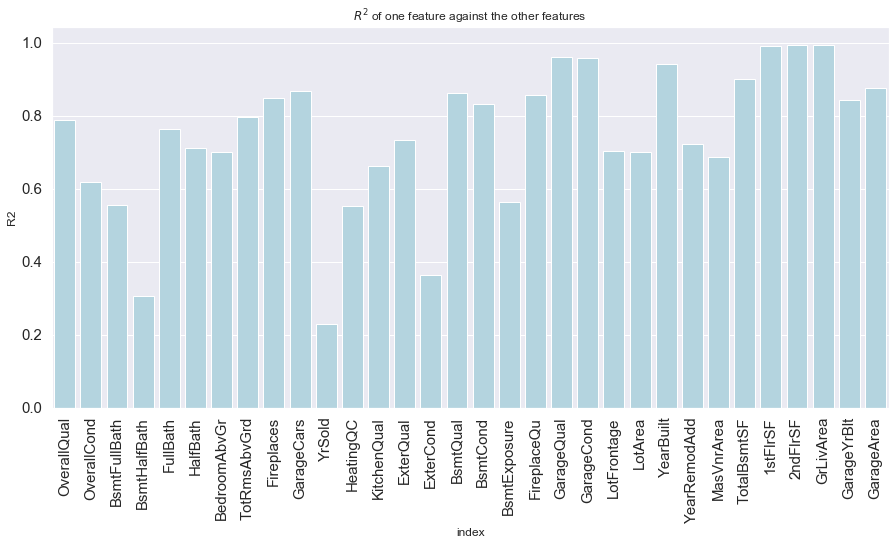

In [133]:
# Austin's original:
scores = {}
ols = LinearRegression()
for feature in cont_var_for_tuning:
                x_copy = x.copy()
                feature_col = x_copy[feature].copy()
                x_copy.drop(feature, axis=1, inplace=True)
                ols.fit(x_copy, feature_col)
                scores[feature] = ols.score(x_copy, feature_col)   
plt.figure(figsize=(15,7))
clrs = ['lightblue']
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index(), palette = clrs)
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=15);
plt.xticks(size=15);

In [134]:
def original_plot():
    
    # Austin's original:
    scores = {}
    ols = LinearRegression()
    for feature in cont_var_for_tuning:
                    x_copy = x.copy()
                    feature_col = x_copy[feature].copy()
                    x_copy.drop(feature, axis=1, inplace=True)
                    ols.fit(x_copy, feature_col)
                    scores[feature] = ols.score(x_copy, feature_col)   
    plt.figure(figsize=(15,7))
    clrs = ['lightblue']
    ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index(), palette = clrs)
    plt.title('$R^2$ of one feature against the other features');
    plt.xticks(rotation=90);
    plt.yticks(size=15);
    plt.xticks(size=15);

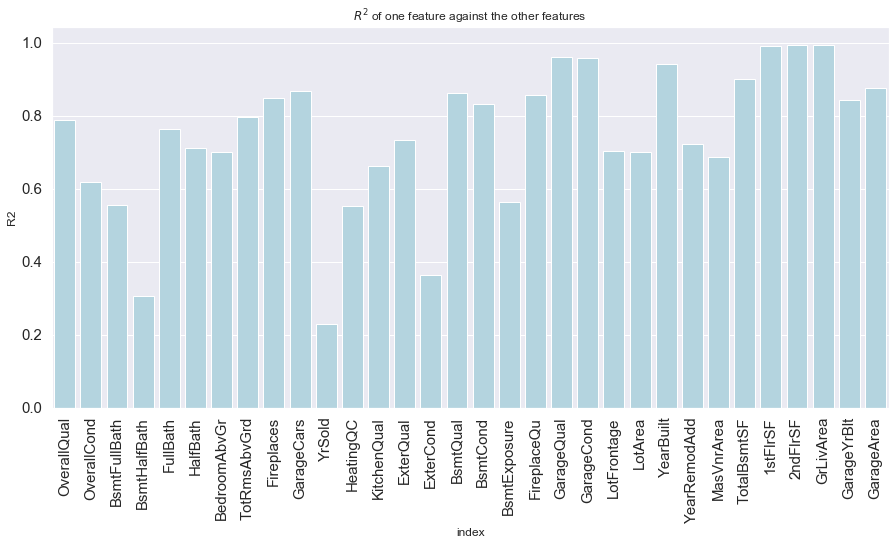

In [135]:
original_plot()

---

## VIF trials

In [136]:
# # ======================================================

# # Making copies before trails 

#     # Do NOT run if not required.
#     # Commenting it after i've run it

# x_orig = x.copy()
# y_orig = y.copy()

# scores_orig = scores.copy()

# nominal_var_processed_orig = nominal_var_processed.copy()
# ordinal_var_processed_orig = ordinal_var_processed.copy()
# cont_var_processed_orig = cont_var_processed.copy()

# cont_var_for_tuning_orig = ordinal_var_processed_orig + cont_var_processed_orig

# # ======================================================

In [137]:
def remove_insignificant_column(colname):
    
    try:
        # Removing column from list
        cont_var_for_tuning.remove(colname)
        print('Column {} dropped from Continuous variable list'.format(colname))

        # Dropping column from x
        x.drop([colname],axis=1,inplace=True)

    except:
        raise ValueError('Columm not in list. Re-check column to be dropped from Continuous variable list')

In [138]:
def plot_highlighted_vif(list_of_columns):
    scores = {}
    ols = LinearRegression()
    for feature in cont_var_for_tuning:
                    x_copy = x.copy()
                    feature_col = x_copy[feature].copy()
                    x_copy.drop(feature, axis=1, inplace=True)
                    ols.fit(x_copy, feature_col)
                    scores[feature] = ols.score(x_copy, feature_col)   

    plt.figure(figsize=(15,7))

    clrs = ['blue' if (x in list_of_columns) else 'lightblue' for x in cont_var_for_tuning ]

    ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index(), palette = clrs)
    plt.title('$R^2$ of one feature against the other features');
    plt.xticks(rotation=90);
    plt.yticks(size=15);
    plt.xticks(size=15);

    # Printing out the R2 for the columns of specific interest as well
    print('~'*30)
    print('Scores of columns of interest:')
    print('~'*30)
    for v in list_of_columns:
        print(v, scores[v])

---

###  Multicollinearity to be assessed:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1stFlrSF 0.9905195556735192
2ndFlrSF 0.993118146028361
GrLivArea 0.9938544633522475
TotalBsmtSF 0.9022011227161376
YearBuilt 0.9412920665829639
GarageQual 0.9602196130226778
GarageCond 0.9594465768067411
GarageCars 0.8691705378047535
FireplaceQu 0.8571653898914218
Fireplaces 0.8497313641858529
BsmtQual 0.8625141557623802
BsmtCond 0.8315934008570851
GarageYrBlt 0.8429197971316386
GarageArea 0.8769385620260742


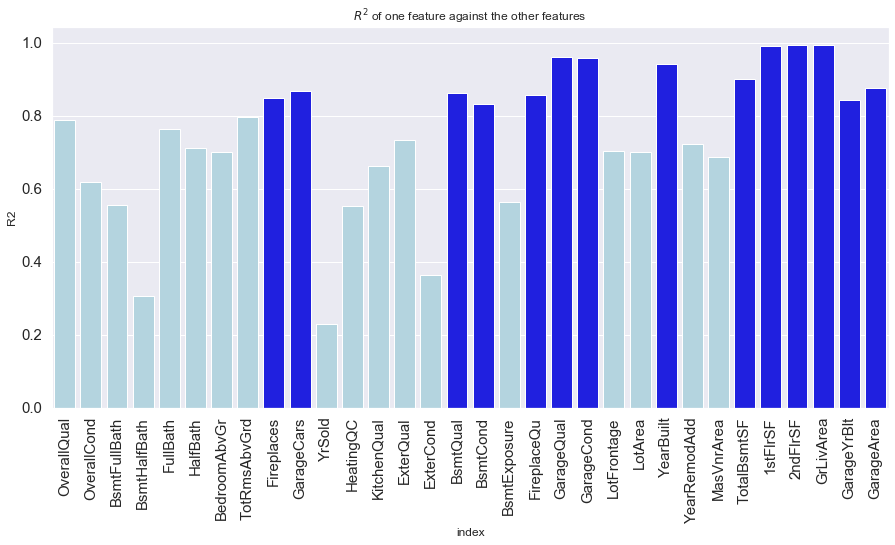

In [139]:
plot_highlighted_vif(['1stFlrSF','2ndFlrSF','GrLivArea', 'TotalBsmtSF','YearBuilt'\
                      ,'GarageQual','GarageCond','GarageCars','FireplaceQu','Fireplaces',\
                      'BsmtQual','BsmtCond','GarageYrBlt','GarageArea'])

---

## Trial 1 - 1stFlrSF

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1stFlrSF 0.9905195556735192
2ndFlrSF 0.993118146028361
GrLivArea 0.9938544633522475


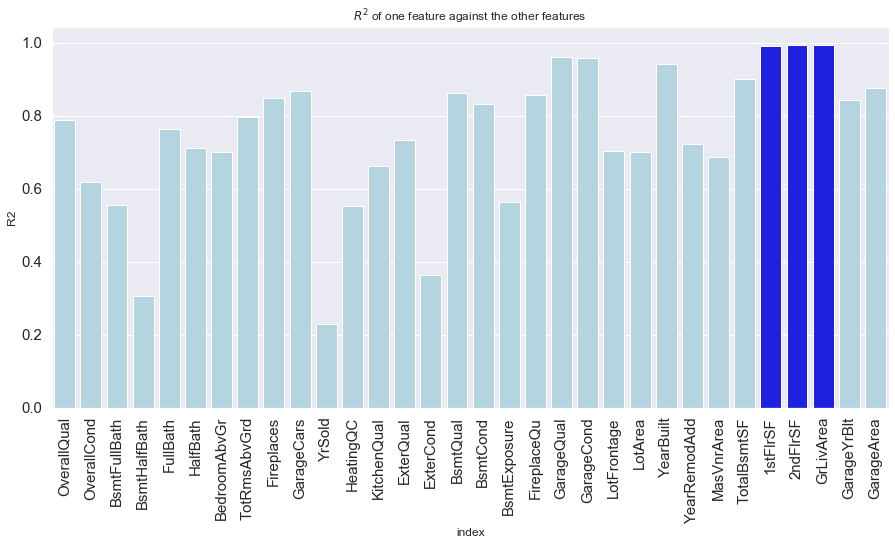

In [140]:
# Below needs to change to include 'LowQualFinSF' that was dropped 
# plot_highlighted_vif(['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'])

plot_highlighted_vif(['1stFlrSF','2ndFlrSF','GrLivArea'])

In [141]:
x_pre_trail1 = x_orig.copy()

In [142]:
# Call to remove insignificant variable:

remove_insignificant_column('1stFlrSF')

Column 1stFlrSF dropped from Continuous variable list


In [143]:
# Check the drop

# x['1stFlrSF']
# x.head(5)


In [144]:
x_post_trail1 = x.copy()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2ndFlrSF 0.9608076721137461
GrLivArea 0.9368575436128083


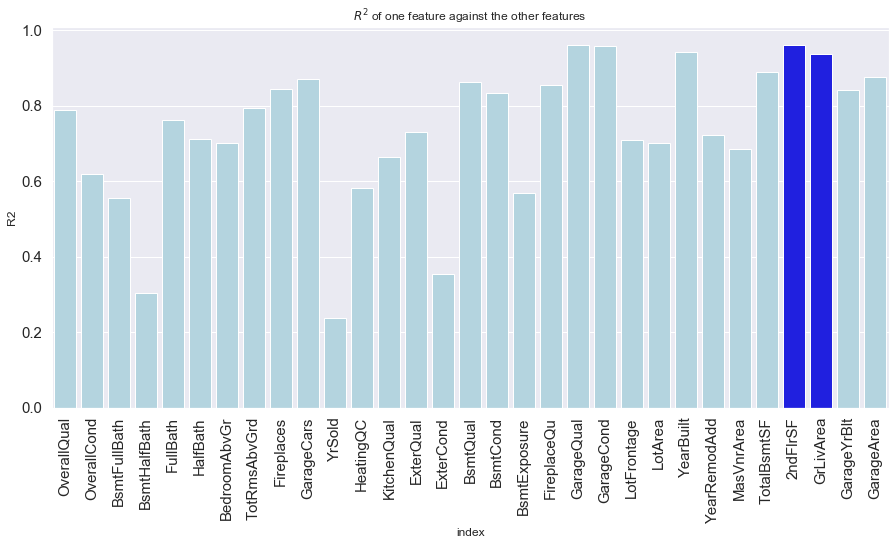

In [145]:
# Trial 1 Plot


plot_highlighted_vif(['2ndFlrSF','GrLivArea'])

---

## Trial 2 - 2ndFlrSF

In [146]:
x_pre_trail2 = x_post_trail1.copy()                            

In [147]:
# Call to remove insignificant variable:

remove_insignificant_column('2ndFlrSF')

Column 2ndFlrSF dropped from Continuous variable list


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GrLivArea 0.9068018378734706


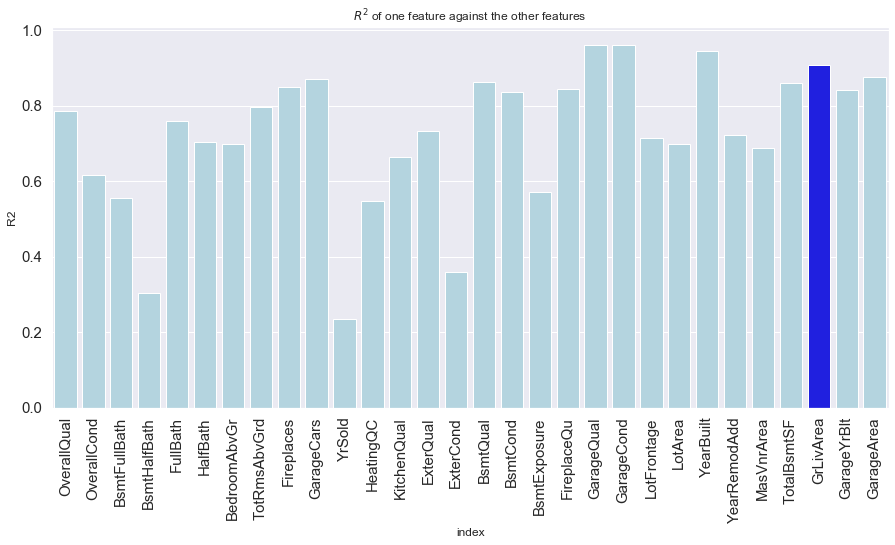

In [148]:
# Trial 2 Plot


plot_highlighted_vif(['GrLivArea'])

In [149]:
x_post_trail2 = x.copy()

---

## Trial 3 - GarageQual and GarageCond

In [150]:
x_pre_trail3 = x_post_trail2.copy()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GarageQual 0.9600446734749547
GarageCond 0.959269130068968


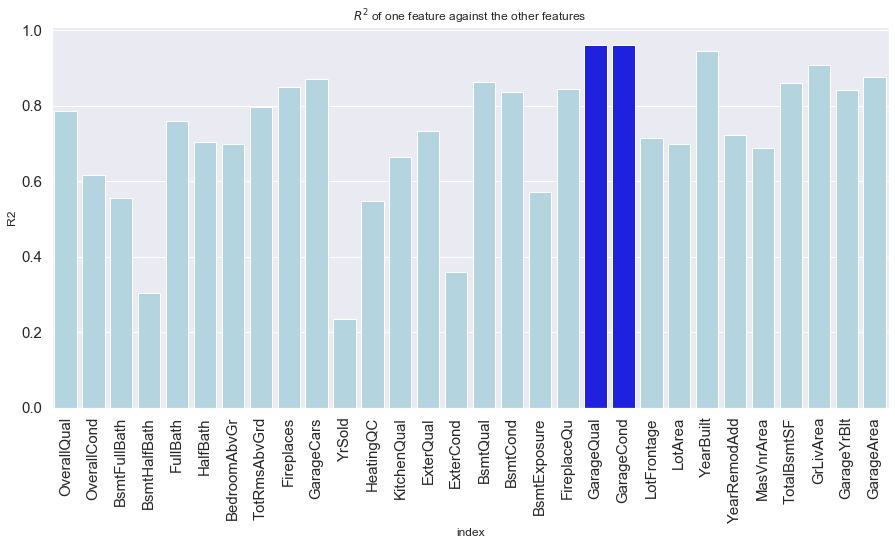

In [151]:
plot_highlighted_vif(['GarageQual','GarageCond'])

In [152]:
# Call to remove insignificant variable:

remove_insignificant_column('GarageCond')

Column GarageCond dropped from Continuous variable list


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GarageQual 0.9373909799017545


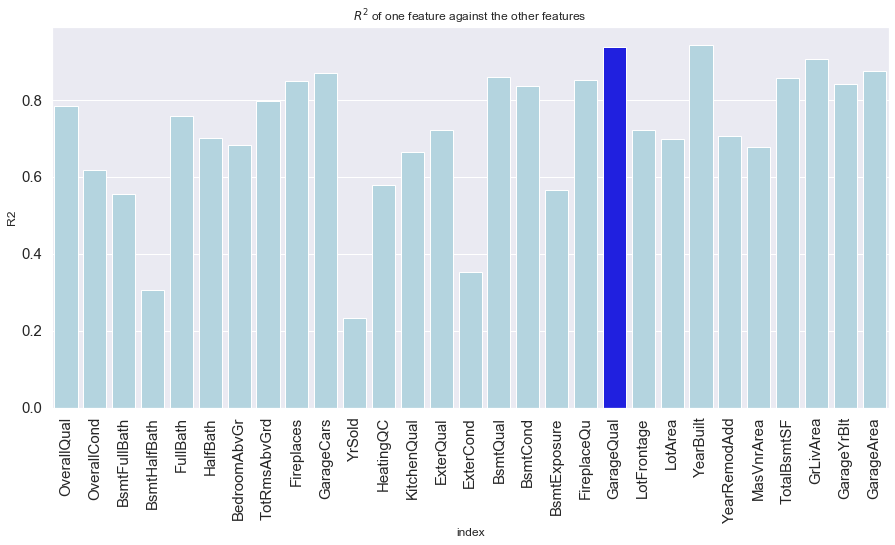

In [153]:
# Trial 3 Plot


plot_highlighted_vif(['GarageQual'])

In [154]:
x_post_trail3 = x.copy()

---

## Trial 4 - GarageArea and GarageCars

In [155]:
x_pre_trail4 = x_post_trail3.copy()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GarageArea 0.8752317423871142
GarageCars 0.8691628987716598


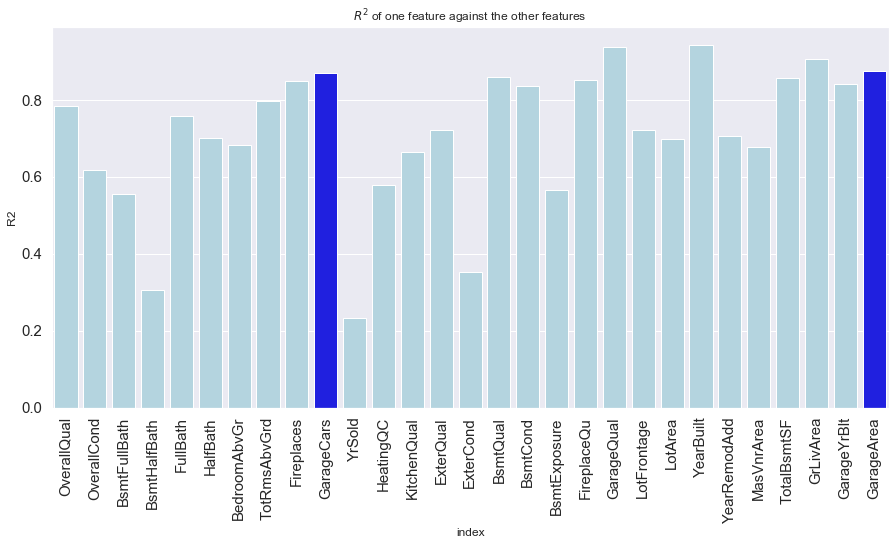

In [156]:
plot_highlighted_vif(['GarageArea','GarageCars'])

In [157]:
# Call to remove insignificant variable:

remove_insignificant_column('GarageCars')

Column GarageCars dropped from Continuous variable list


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GarageArea 0.7692354023703967


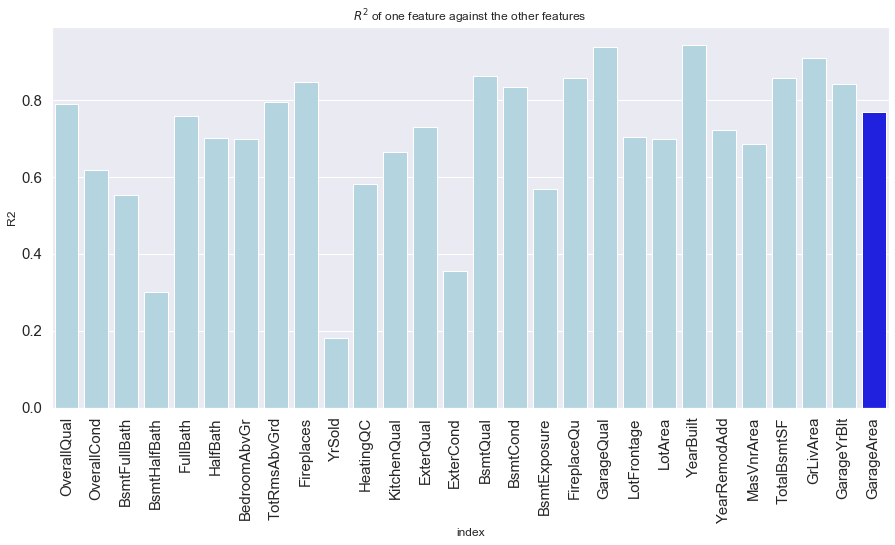

In [158]:
# Trial 4 Plot


plot_highlighted_vif(['GarageArea'])

In [159]:
x_post_trail4 = x.copy()

---

## Trial 5 - BsmtQual and BsmtCond

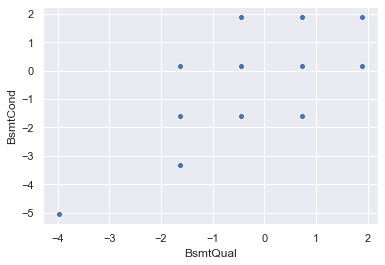

In [160]:
ax = sns.scatterplot(x="BsmtQual", y="BsmtCond", data=x)



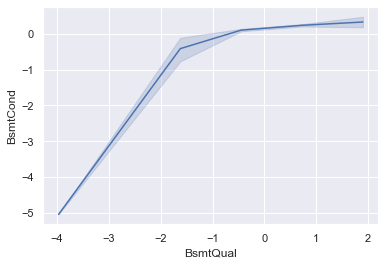

In [161]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="BsmtQual", y="BsmtCond", data=x)

In [84]:
x_pre_trail5 = x_post_trail4.copy()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
BsmtQual 0.8617828667291533
BsmtCond 0.8349483818075059


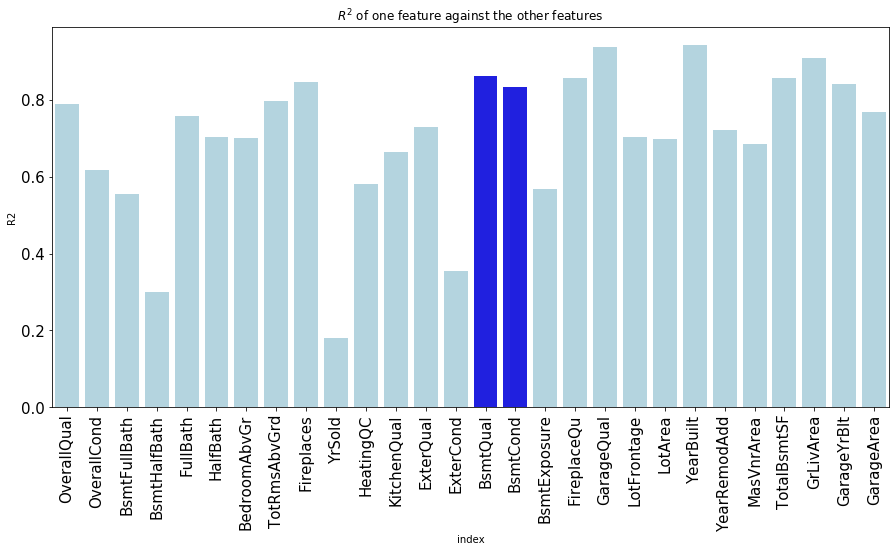

In [85]:
plot_highlighted_vif(['BsmtQual','BsmtCond'])

In [121]:
# Call to remove insignificant variable:

remove_insignificant_column('BsmtCond')

Column BsmtCond dropped from Continuous variable list


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scores of columns of interest:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
BsmtQual 0.8581411911083103


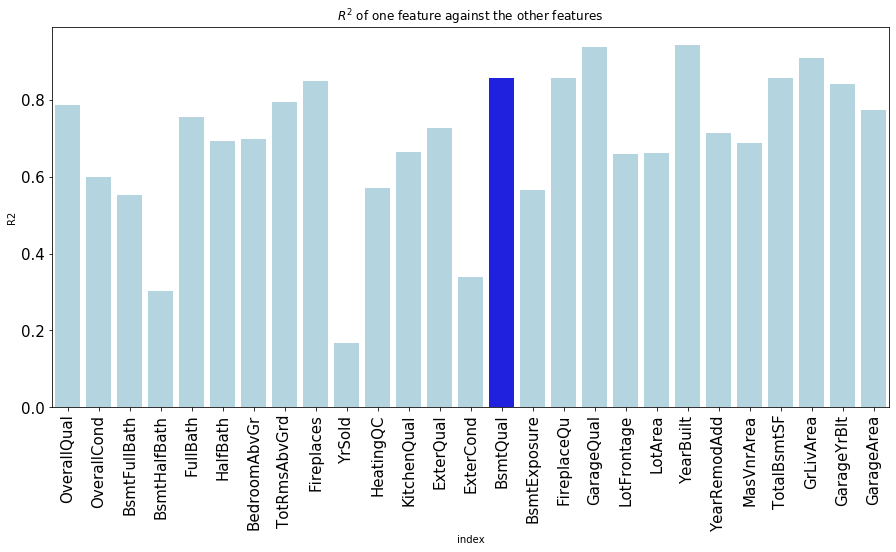

In [122]:
# Trial 5 Plot


plot_highlighted_vif(['BsmtQual'])

In [123]:
x_post_trail5 = x.copy()

---

## Trial 6 - Fireplaces and FireplaceQU

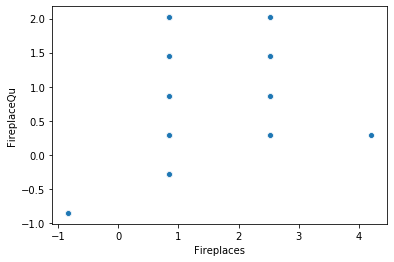

In [124]:
ax = sns.scatterplot(x="Fireplaces", y="FireplaceQu", data=x)

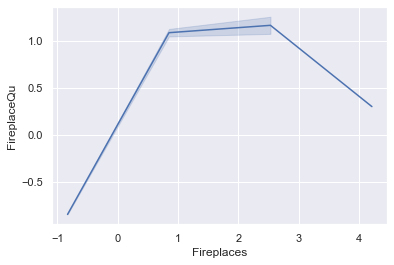

In [125]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Fireplaces", y="FireplaceQu", data=x)

---

# DF of all trials

In [164]:
x_post_trail1
x_post_trail2
x_post_trail3
x_post_trail4
x_post_trail5



---